In [1]:
import matplotlib.pyplot as plt
import ga4graphcoloring as ga
import random

# GA Graph Coloring

Short example in the use of the package to solve the graph coloring problem.

## Problem description

The graph coloring problem consists in assigning a color to each node of a graph in such a way that no two adjacent nodes have the same color.
The decision version of the problem: _Is it possible to color the graph with at most k colors?_ is NP-complete.

## Graph representation

The graph is represented as an adjacency matrix, where the element $(i, j)$ is 1 if there is an edge between nodes $i$ and $j$, and 0 otherwise.
The graph is undirected and simple, i.e., there is at most one edge between two nodes and there are no self-loops.
In particular for the problem, vertices also have a color.

#### Code example

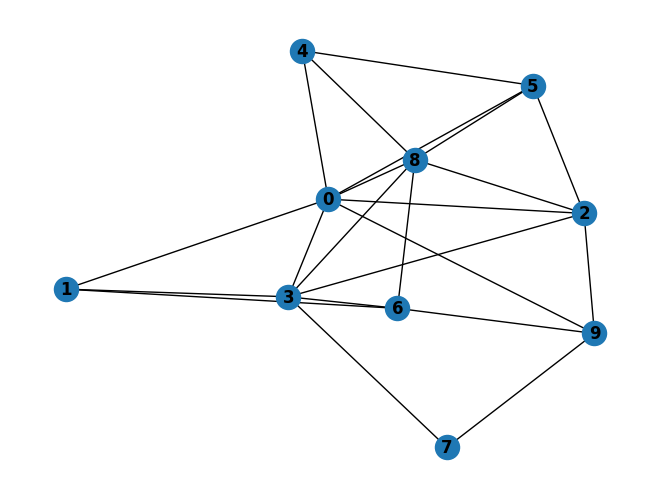

In [2]:
# create and display a random graph

g = ga.Graph(n_vertices=10, density_factor=0.5)
g.display()

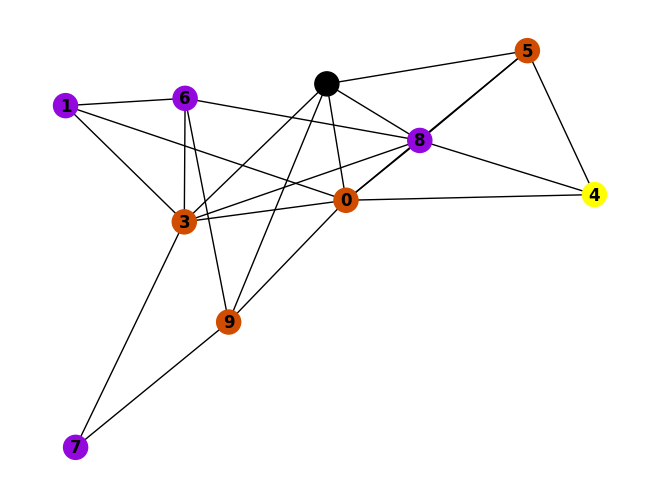

In [3]:
# the graph can be displayed with the colors of the vertices when provided

colors = [random.randint(0, 3) for _ in range(10)]
g.display(colors=colors)

## Genetic algorithm

The genetic algorithm is a heuristic search algorithm inspired by the process of natural selection.
It is based on the idea of evolution, where the fittest individuals are selected for reproduction in order to produce offspring of the next generation.

The algorithm works as follows:
1. **Initialization**: A population of individuals is randomly generated.
2. **Evolution**: The population is evolved over a number of generations. At each generation, the following steps are performed:
    - **Crossover**: Pairs of individuals are selected for reproduction. The crossover operator is applied to produce offspring.
    - **Mutation**: The offspring is subject to mutation, which introduces small random changes in the individuals.
3. **Termination**: The algorithm stops after a number of generations or when a stopping criterion is met.

#### Code example

Solution found in 3 iterations


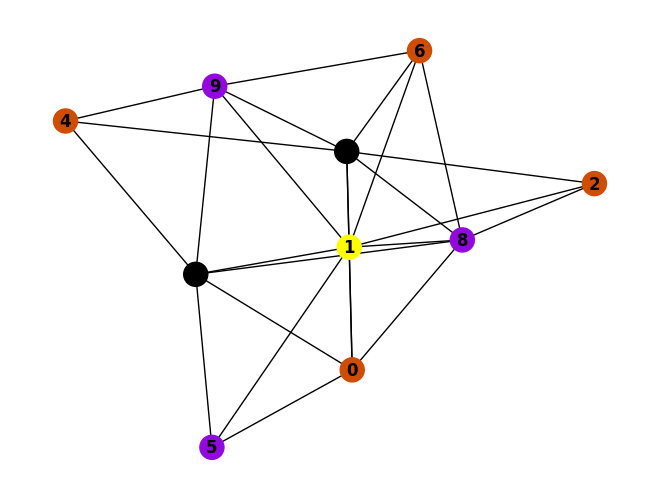

In [4]:
def find_solution(graph, k, max_iter=1000, population_size=100):
    # init population
    pop = ga.Population(k, population_size, graph)
    
    # evolve for max_iter generations
    for i in range(max_iter):
        pop.evolve()
        if pop.best_fitness == 0:
            # if a solution is found, stop
            print(f"Solution found in {i} iterations")
            break

    return pop.solution

# generate a random graph and find a solution

g = ga.Graph(10, 0.5)
sol = find_solution(g, 4, max_iter=100, population_size=50)
g.display(sol)

In [ ]:
# We can see the progress of the population over the generations

def evolution_course(graph, k, max_iter=1000, population_size=100):
    pop = ga.Population(k, population_size, graph)
    fitness_history = []
    for i in range(max_iter):
        pop.evolve(elitism=False)
        fitness_history.append(pop.best_fitness)
    
    # plot
    plt.plot(fitness_history)
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.title('Fitness over iterations')
    plt.show()
    
    if g.n_vertices < 20:
        g.display(pop.solution)

g = ga.Graph(100, 0.4)
evolution_course(g, 16, max_iter=100, population_size=100)